In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
pd.set_option('display.max_columns', 200)

In [4]:
df = pd.read_csv('movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


In [5]:
df.shape

(10866, 21)

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [1]:
#Dropping columns to get a clearer view for my analysis

In [7]:
df.drop(columns = ['id','imdb_id','homepage','cast','tagline','overview','budget_adj','revenue_adj'], inplace = True)

In [9]:
df.head(3)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015


In [ ]:
# Checking for null values & replacing the nulls/na with '0'

In [10]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [12]:
df.dropna(how = 'any', subset = ['genres','director'], inplace = True)

In [13]:
df['production_companies'] = df['production_companies'].fillna(0)
df['keywords'] = df['keywords'].fillna(0)

In [14]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [15]:
df['popularity'] = df['popularity'].round(2)

In [17]:
# Next, moving to manipulating and analyzing the data
# - Rounding the decimal point on popularity column
# - Creating 2 more columns  a. Profit  b. RoI(return of investment)

In [18]:
df.insert(3, 'profit', (df.revenue - df.budget))
df.insert(4, 'roi', (df.profit / df.budget))

In [20]:
df.head(3)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,13.11,110000000,295238201,185238201,1.683984,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015


In [ ]:
#1 Using histograms to help uncover patterns and distributions

In [37]:
df1 = df[['popularity','budget','revenue','profit','roi','vote_count','vote_average','release_year']]

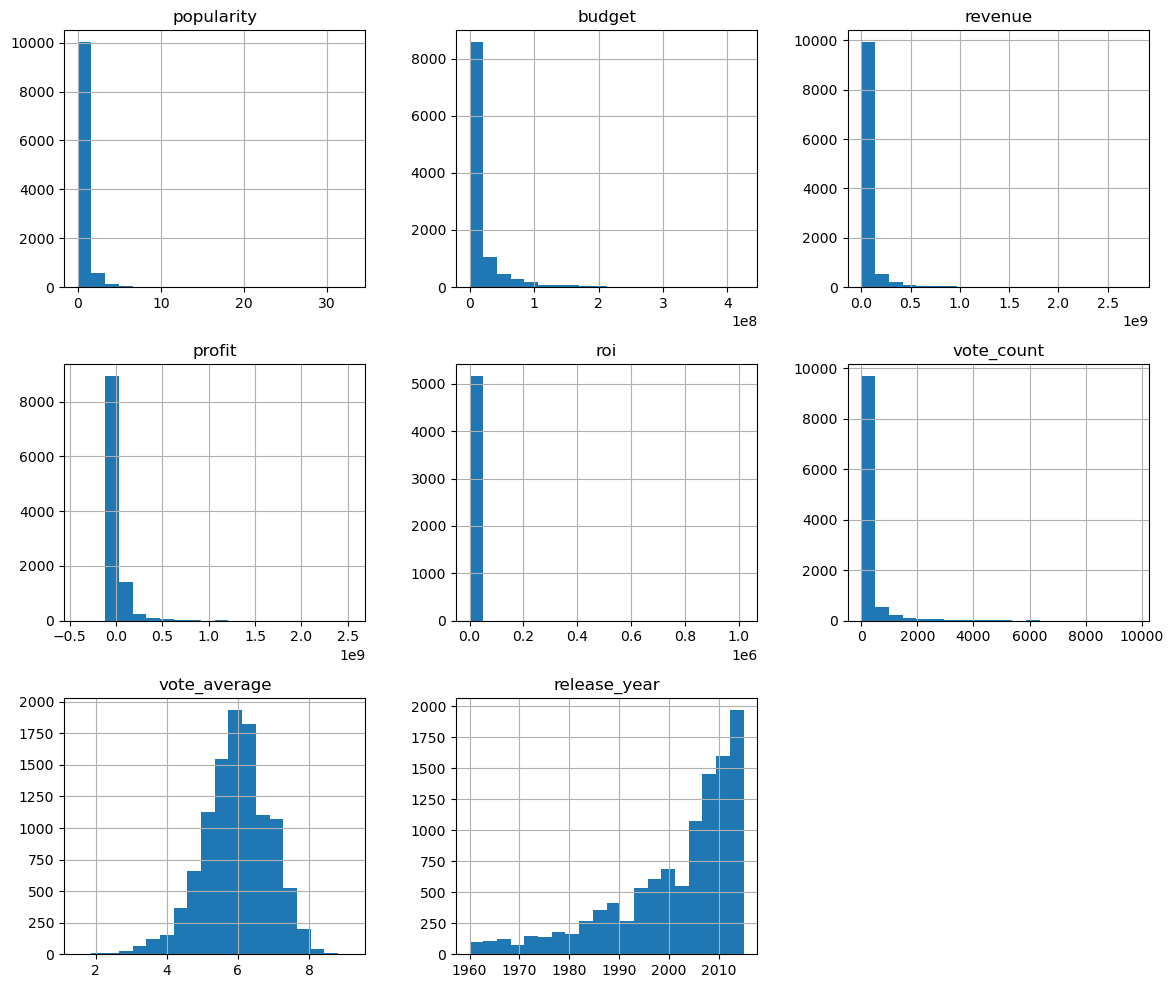

In [39]:
df1.hist(bins=20, figsize =(14,12))
plt.show()

In [42]:
#2 Looking at the ROI(Return of Investment) column

In [45]:
df2 = df.groupby('release_year')['roi'].mean().round(2)

In [46]:
df2

release_year
1960        5.42
1961        5.91
1962        4.53
1963        2.93
1964        5.50
1965        3.24
1966        0.18
1967        8.48
1968        1.62
1969        3.13
1970        8.11
1971        6.29
1972       35.26
1973       21.23
1974       23.58
1975       17.22
1976       13.29
1977       40.42
1978       16.15
1979       15.34
1980        7.31
1981        6.07
1982        6.59
1983        2.84
1984        3.94
1985     1071.34
1986    16979.92
1987        3.78
1988        2.01
1989        3.47
1990        3.12
1991        1.66
1992        2.79
1993        2.00
1994        3.44
1995        2.07
1996        1.15
1997        2.01
1998        1.46
1999       68.27
2000        0.85
2001        1.27
2002        1.75
2003        1.46
2004        7.28
2005        1.86
2006        1.58
2007       59.27
2008        1.16
2009        0.64
2010        2.07
2011      103.07
2012        1.65
2013        1.01
2014        2.04
2015        4.15
Name: roi, dtype: float64

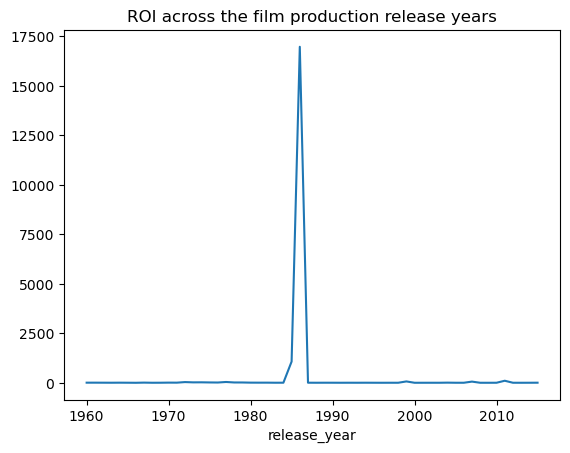

In [134]:
df2.plot(kind='line')
plt.title('ROI across the film production release years')
plt.show()

In [48]:
# The 1980-1990 decade achieved the highest possible ROI, meaning the highest profitability in the film industry.

In [52]:
#3 Exploring the Films popularity relationship and the release year

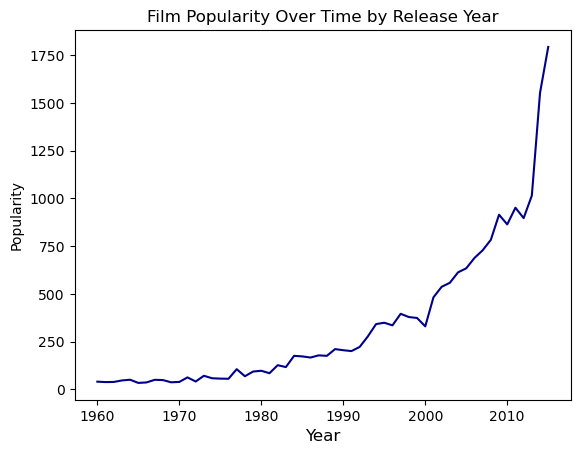

In [135]:
df3 = df.groupby('release_year')['popularity'].sum()
df3.plot(kind='line',color ='DarkBlue')
plt.xlabel('Year',fontsize =12)
plt.ylabel('Popularity')
plt.title('Film Popularity Over Time by Release Year')
plt.show()

In [55]:
# Noticing that the 2010 - 2010 has almost tripled the popularity of films. Guessing with the help of internet

In [56]:
#4 Moving forward with the Ratings and the Release Year relationship

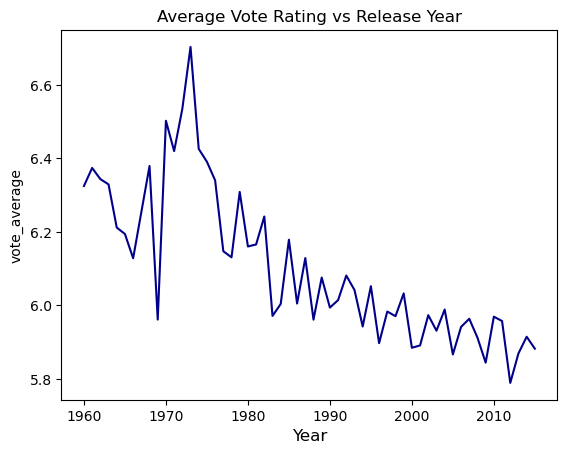

In [60]:
df3 = df.groupby('release_year')['vote_average'].mean()
df3.plot(kind='line',color ='DarkBlue')
plt.xlabel('Year',fontsize =12)
plt.ylabel('vote_average')
plt.title('Average Vote Rating vs Release Year')
plt.show()

In [62]:
#i notice that even though the popularity is increasing over the span of years, the quality of the film productions is much lower

In [63]:
# Getting a glimpse at the genres comparing to the film popularity

In [64]:
df.genres.value_counts()

genres
Drama                                      711
Comedy                                     707
Documentary                                306
Drama|Romance                              289
Comedy|Drama                               280
                                          ... 
Science Fiction|Horror|Action|Thriller       1
Action|Thriller|Science Fiction|Mystery      1
Comedy|Music|Romance|Foreign                 1
Documentary|Drama|Comedy                     1
Mystery|Science Fiction|Thriller|Drama       1
Name: count, Length: 2031, dtype: int64

In [66]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10801, dtype: object

In [67]:
# Some data are not cleaned, they appear in nested format like [Action, Adventure, Science Fiction, Thriller]
# I will normalize the dataset and asign one row for each of the genre provided by splitting them.

In [68]:
split = ['genres']
for i in split:
    df[i] = df[i].apply(lambda x: x.split("|"))
df.head(2)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015


In [70]:
df = df.explode('genres')
df.head(5)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015


In [6]:
#5 Proceeding with the plotting

In [94]:
df5 = df.groupby('genres')['popularity'].sum().astype(int).sort_values(ascending=True)

In [95]:
df5

genres
Foreign              35
TV Movie             44
Documentary          93
Western              97
History             192
War                 196
Music               198
Mystery             558
Animation           594
Horror              761
Fantasy             908
Family              967
Crime              1009
Romance            1013
Science Fiction    1230
Adventure          1697
Thriller           2155
Action             2208
Comedy             2246
Drama              2815
Name: popularity, dtype: int32

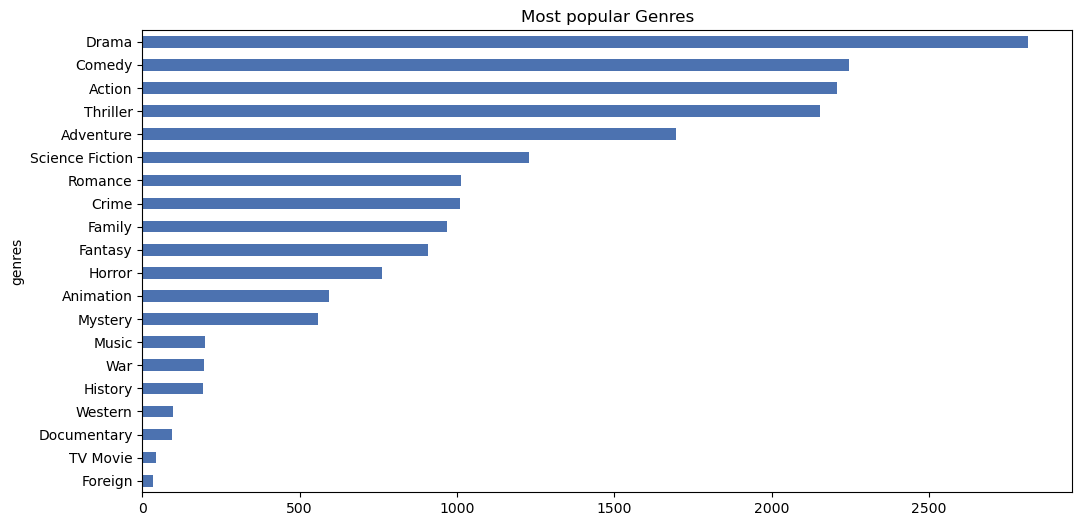

In [101]:
df5.plot.barh(x='genres', y = 'popularity',color = '#4c72b0', figsize = (12,6))
plt.title('Most popular Genres')
plt.show()

In [103]:
# The top five most sought-after film genres are Drama, Comedy, Action, Thriller, and Adventure, reflecting audience preferences.

In [104]:
df.head(3)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015


In [105]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
profit                    int64
roi                     float64
original_title           object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [106]:
#6 Amending the release_date data type and extracting the Month from the release date

In [107]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [108]:
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
profit                           int64
roi                            float64
original_title                  object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [109]:
df['extracted_month'] = df['release_date'].dt.month

In [111]:
df.head(3)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,extracted_month
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6


In [116]:
df6 = df.groupby('extracted_month')['popularity'].sum().astype(int)
df6

extracted_month
1     1131
2     1092
3     1458
4     1191
5     1687
6     1936
7     1694
8     1432
9     1872
10    1811
11    1710
12    2002
Name: popularity, dtype: int32

In [114]:
# Converting the index number to month names

In [117]:
df6.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='extracted_month')

In [118]:
df6.values

array([1131, 1092, 1458, 1191, 1687, 1936, 1694, 1432, 1872, 1811, 1710,
       2002])

In [119]:
data = { 
    'extracted_month' : df6.index,
    'popularity' : df6.values
}
df6 = pd.DataFrame(data)

In [120]:
df6

,extracted_month,popularity
0,1,1131
1,2,1092
2,3,1458
3,4,1191
4,5,1687
5,6,1936
6,7,1694
7,8,1432
8,9,1872
9,10,1811


In [121]:
index_to_month = {
    1: 'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'

}

In [122]:
df6.extracted_month =df6.extracted_month.map(index_to_month)

In [123]:
df6

,extracted_month,popularity
0,January,1131
1,February,1092
2,March,1458
3,April,1191
4,May,1687
5,June,1936
6,July,1694
7,August,1432
8,September,1872
9,October,1811


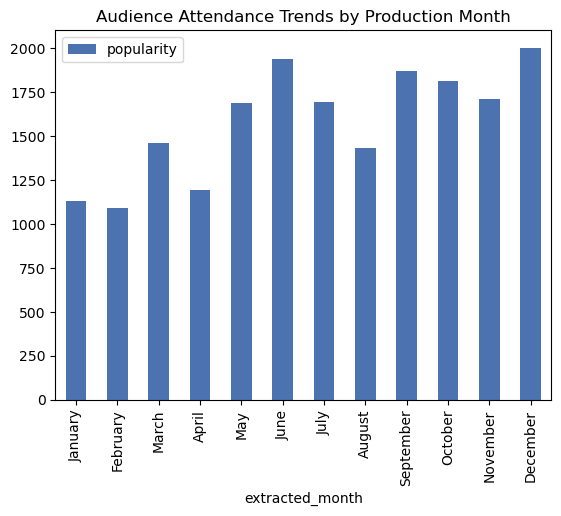

In [128]:
df6.plot(kind='bar', x='extracted_month',y='popularity',color = '#4c72b0')
plt.title('Audience Attendance Trends by Production Month')
plt.show()

In [ ]:
#June sees the highest audience attendance,followed by those released in September-December.Late-year releases tend to gather the highest viewership

In [ ]:
#7 Top 5 Films

In [136]:
df7 = df.groupby('original_title')['profit'].sum().sort_values(ascending=False).head(5)

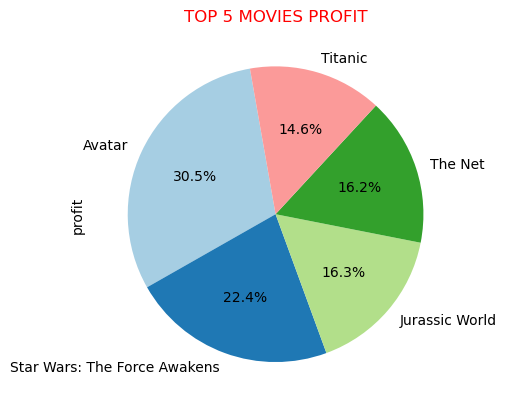

In [141]:
df7.plot(kind = 'pie',autopct = '%1.1f%%', startangle = 100, colors = plt.cm.Paired.colors)
plt.title('TOP 5 MOVIES PROFIT', color = 'red')
plt.show()